In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../assets/train.csv')
test = pd.read_csv('../assets/test.csv', index_col='Id')
weather = pd.read_csv('../assets/weather.csv')
spray = pd.read_csv('../assets/spray.csv')

## <span style='background :yellow' > Train and Test Dataset </span>

In [16]:
#Print shape of dataset
print('train:', train.shape)
print('test:', test.shape)

train: (10506, 12)
test: (116293, 10)


In [18]:
# Print columns
print(train.columns)
print(test.columns)

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')
Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy'],
      dtype='object')


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [5]:
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

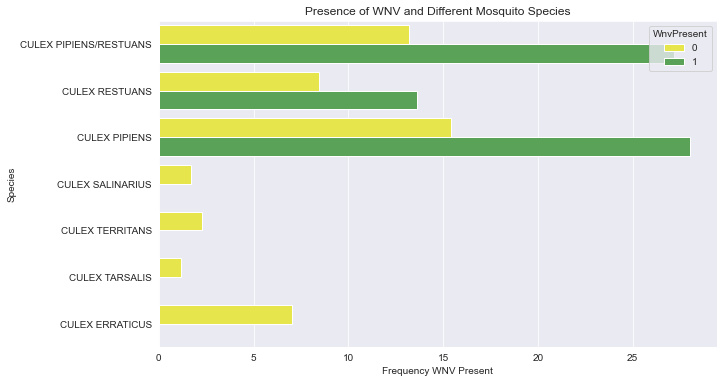

In [21]:
# Looking at the Frequency of MNV in difference mosquito species
plt.figure(figsize=(10,6))
sns.barplot(y='Species', x='NumMosquitos', hue='WnvPresent', data=train, palette='Set1_r', ci=None)
plt.title('Presence of WNV and Different Mosquito Species')
plt.xlabel('Frequency WNV Present');

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 1 to 116293
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    116293 non-null  object 
 1   Address                 116293 non-null  object 
 2   Species                 116293 non-null  object 
 3   Block                   116293 non-null  int64  
 4   Street                  116293 non-null  object 
 5   Trap                    116293 non-null  object 
 6   AddressNumberAndStreet  116293 non-null  object 
 7   Latitude                116293 non-null  float64
 8   Longitude               116293 non-null  float64
 9   AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 9.8+ MB


In [8]:
test.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64

## <span style='background :yellow' > Weather Dataset </span>

In [9]:
weather.head(20)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,...,,M,M,M,T,29.46,30.09,11.2,7,11.5


In [10]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [11]:
weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

## <span style='background :yellow' > Spray Dataset </span>

In [12]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [13]:
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

## <span style='background :yellow' > Drop Duplicates for Train, Weather, Spray Dataset </span>

In [ ]:
print("Original Number rows in Train Dataset: ", len(train))
print("Original Number of post in Weather Dataset: ", len(weather))
print("Original Number of post in Spray Dataset: ", len(spray))
print('')

print("Original Number Duplicates in Train Dataset: ", train.duplicated().sum())
print("Original Number Duplicates in Weather Dataset: ", weather.duplicated().sum())
print("Original Number Duplicates in Spray Dataset: ", spray.duplicated().sum())
print('')

train.drop_duplicates(inplace = True)
weather.drop_duplicates(inplace = True)
spray.drop_duplicates(inplace = True)

print("Number of rows in train w/o duplicates: ", len(train))
print("Number of rows in Weather w/o duplicates: ", len(weather))
print("Number of rows in spray w/o duplicates: ", len(spray))

## <span style='background :yellow' > Rename columns and Convert Datetime </span>

In [ ]:
def apply_change_df (data):
    
    ##Rename Columns
    data.columns = [x.lower() for x in data.columns]
    
    ##Convert Date column to Date time object
    data['date'] = pd.to_datetime(data['date'])
    
    return

In [ ]:
apply_change_df(train)
apply_change_df(test)
apply_change_df(weather)
apply_change_df(spray)